<a href="https://colab.research.google.com/github/snehi04/Machine-Learning-Using-Python/blob/master/Decision_Tree_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!apt-get -qq install -y graphviz && pip install -q pydot
!pip install graphviz
!pip install pydot

In [0]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from matplotlib import pyplot
from matplotlib import pylab
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from pydot import graph_from_dot_data

In [0]:
#Loading Dataset
data=datasets.load_breast_cancer()

In [14]:
data

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

In [15]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [0]:
#Creating Dataframes
bcancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [17]:
bcancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


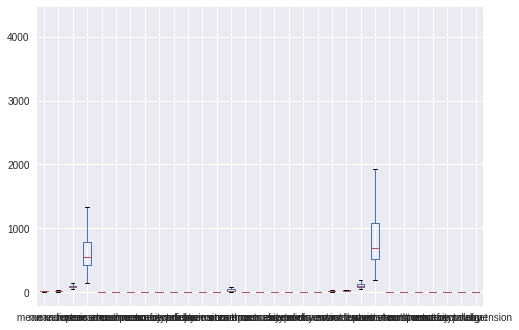

In [18]:
#Exploratory Data Analysis
bcancer_df.plot.box()

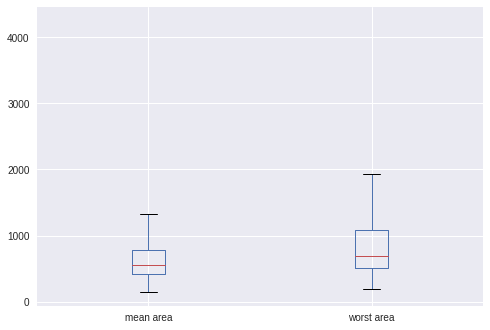

In [19]:
bcancer_df[['mean area', 'worst area']].plot.box()

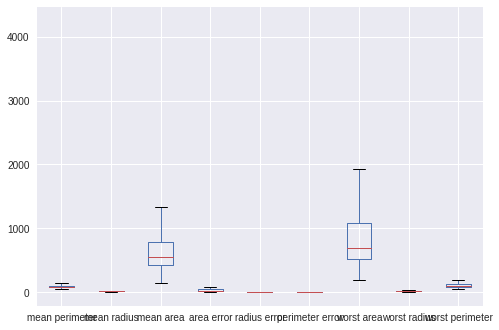

In [20]:
bcancer_df[['mean perimeter' , 'mean radius' , 'mean area' , 'area error' , 'radius error' , 'perimeter error' , 'worst area' , 'worst radius' , 'worst perimeter']].plot.box()

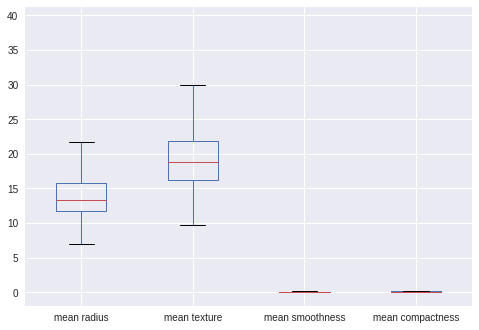

In [21]:
bcancer_df[['mean radius', 'mean texture' , 'mean smoothness' , 'mean compactness']].plot.box()

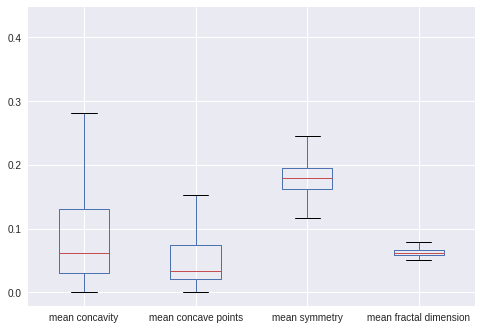

In [22]:
bcancer_df[['mean concavity', 'mean concave points' , 'mean symmetry' , 'mean fractal dimension']].plot.box()

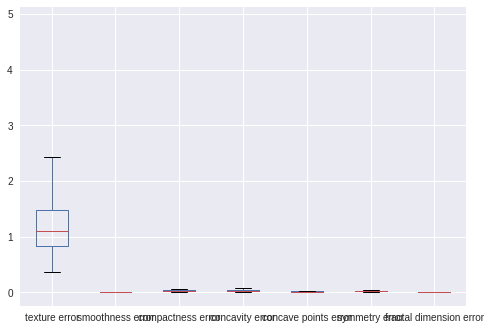

In [23]:
bcancer_df[['texture error' , 'smoothness error' , 'compactness error' , 'concavity error' , 'concave points error' , 'symmetry error' , 'fractal dimension error']].plot.box()

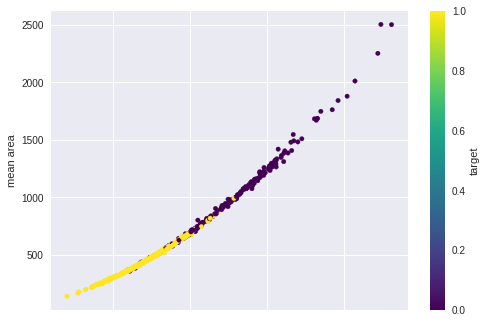

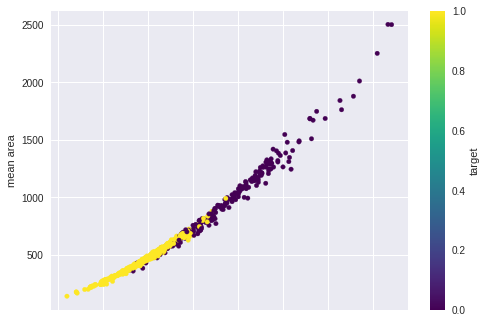

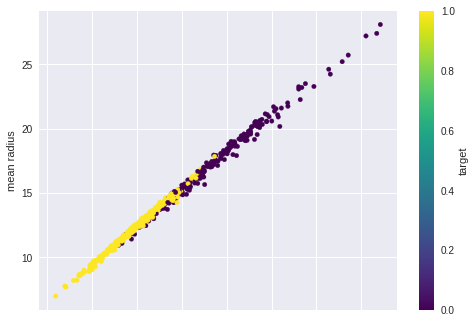

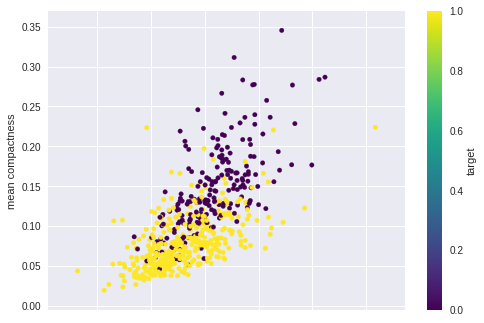

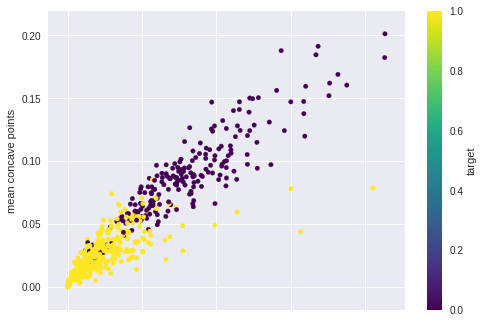

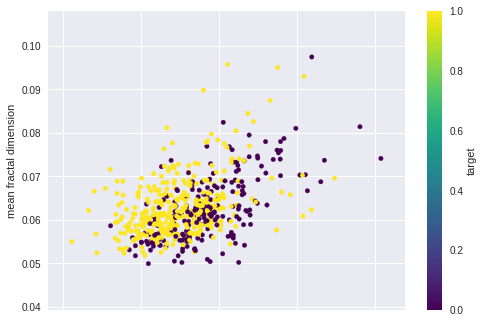

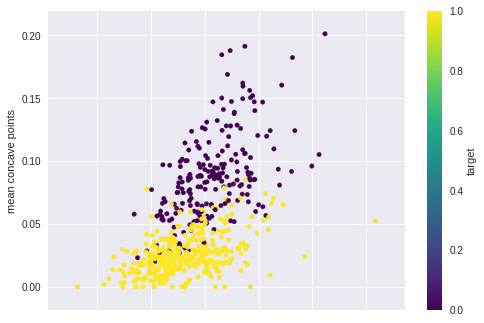

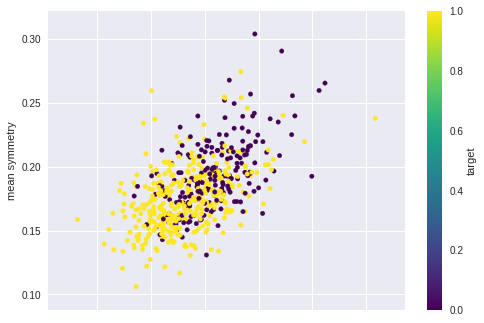

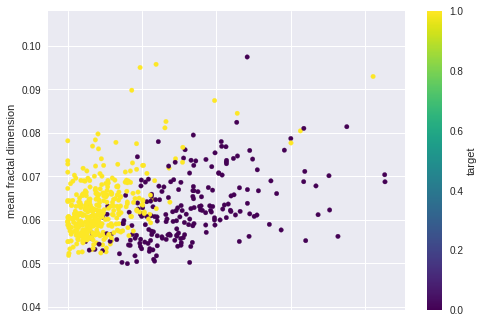

In [24]:
#Scatter Plot
bcancer_df.plot.scatter(x='mean radius' , y='mean area' , c='target' , cmap = 'viridis')
bcancer_df.plot.scatter(x='mean perimeter' , y='mean area' , c='target' , cmap = 'viridis')
bcancer_df.plot.scatter(x='mean perimeter' , y='mean radius' , c='target' , cmap = 'viridis')
bcancer_df.plot.scatter(x='mean smoothness' , y='mean compactness' , c='target' , cmap = 'viridis')
bcancer_df.plot.scatter(x='mean concavity' , y='mean concave points' , c='target' , cmap = 'viridis')
bcancer_df.plot.scatter(x='mean symmetry' , y='mean fractal dimension' , c='target' , cmap = 'viridis')
bcancer_df.plot.scatter(x='mean smoothness' , y='mean concave points' , c='target' , cmap = 'viridis')
bcancer_df.plot.scatter(x='mean smoothness' , y='mean symmetry' , c='target' , cmap = 'viridis')
bcancer_df.plot.scatter(x='mean concavity' , y='mean fractal dimension' , c='target' , cmap = 'viridis')

In [0]:
train_df, test_df= train_test_split(bcancer_df, random_state=3)

In [26]:
tree = DecisionTreeClassifier()
tree.fit(train_df.drop('target', axis=1), train_df['target'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
sum(tree.predict(test_df.drop('target',axis=1))==test_df['target'])

133

In [28]:
confusion_matrix(tree.predict(test_df.drop('target',axis=1)),test_df['target'])

array([[47,  4],
       [ 6, 86]])

In [0]:
!pip install pydotplus

In [0]:
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  

path=StringIO()
export_graphviz(tree, out_file=path,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(path.getvalue())
Image(graph.create_png())

**Comparison with Logistic Regression **

In [31]:
lr = LogisticRegression()
lr.fit(train_df.drop('target', axis=1), train_df['target'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
sum(lr.predict(test_df.drop('target',axis=1))==test_df['target'])

134

In [26]:
confusion_matrix(lr.predict(test_df.drop('target',axis=1)),test_df['target'])

array([[48,  4],
       [ 5, 86]])

Both the Algorithm performed equally